首先，我们考虑一个简单的 random walk，从0开始，步长为1和–1的概率相等。

用 Python 内置的模块进行1000步的操作：

In [1]:
import random
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

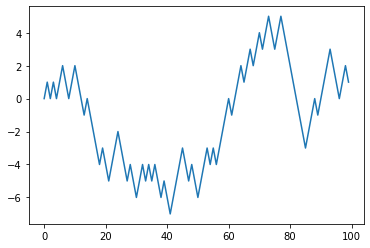

In [2]:
import matplotlib.pyplot as plt
plt.plot(walk[:100])

用 NumPy 的方法其实相对而言简单许多：

In [3]:
nsteps = 1000

In [5]:
import numpy as np

In [6]:
draws = np.random.randint(0, 2, size = nsteps)

In [7]:
steps = np.where(draws > 0, 1, -1)

In [8]:
walk = steps.cumsum()

In [9]:
walk.min()

-33

In [10]:
walk.max()

4

更复杂的统计信息是第一次交叉时间，即 random walk 达到特定值的步骤。在这里，我们可能想知道 random walk 要花费多长时间，以使在任意方向上离原点0至少相距10步。

`np.abs（walk）> = 10`给我们一个 Boolean 数组来指示到达的位置是否超过10，但我们希望拿到的数据是第一次到达10或–10的位置。

我们可以使用`argmax`进行计算，它返回 Boolean 数组中最大值的第一个索引（`True`是最大值）：

In [11]:
(np.abs(walk) >= 10).argmax()

141

请注意，此处使用`argmax`并不总是最优的，因为它总是对数组进行完整扫描。 在这种特殊情况下，一旦观察到`True`，我们就知道它是最大值。

### Simulating Many Random Walks at Once

如果您的目标是模拟多次 Random Walks（例如5,000个），则可以对前面的代码进行少量修改即可生成所有Random Walks。 如果传递一个2元组，则`numpy.random`函数将生成一个二维数组，我们可以计算各行的累积和，以一次计算所有5,000次 Random Walks：

In [12]:
nwalks = 5000

In [13]:
nsteps = 1000

In [14]:
draws = np.random.randint(0, 2, size = (nwalks, nsteps)) # 0 or 1

In [15]:
steps = np.where(draws > 0, 1, -1)

In [16]:
walks = steps.cumsum(1)

In [17]:
walks

array([[ -1,   0,   1, ..., -28, -27, -28],
       [  1,   0,   1, ..., -18, -17, -16],
       [ -1,  -2,  -3, ..., -12, -13, -14],
       ...,
       [ -1,   0,  -1, ..., -20, -19, -20],
       [ -1,  -2,  -3, ..., -18, -19, -20],
       [  1,   2,   1, ...,  -6,  -7,  -8]], dtype=int32)

In [18]:
walks.max()

120

In [19]:
walks.min()

-117

在这些路径中，让我们计算出30或–30的最短交叉时间。 这有点棘手，因为并不是所有的 random walks 都达到30。我们可以使用`any`方法进行检查：

In [21]:
hits30 = (np.abs(walks) >= 30).any(1)

In [22]:
hits30

array([ True, False,  True, ..., False, False, False])

In [24]:
hits30.sum() # Number that hit 30 or -30

3355

我们可以使用此 Boolean 数组来选择实际越过绝对30级的步行行数，并在 *axis 1* 上调用`argmax`来获得交叉时间：

In [25]:
crossing_time = (np.abs(walks[hits30]) >= 30).argmax(1)

In [27]:
crossing_time.mean()

497.42921013412814